# A (MNIST)

In [8]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

/home/khairnar.as/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [9]:
mnist_x = mnist.data
mnist_y = mnist.target

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
mnist_x = scaler.fit_transform(mnist_x)

In [15]:
from sklearn.decomposition import PCA

pca_d_5 = PCA(n_components=5)
pca_d_20 = PCA(n_components=20)

mnist_x_d_5 = pca_d_5.fit_transform(mnist_x)
mnist_x_d_20 = pca_d_20.fit_transform(mnist_x)


In [16]:
from sklearn.model_selection import train_test_split

X_train_d_5, X_test_d_5, y_train_d_5, y_test_d_5 = train_test_split(mnist_x_d_5, mnist_y, test_size=0.2, random_state=42)
X_train_d_20, X_test_d_20, y_train_d_20, y_test_d_20 = train_test_split(mnist_x_d_20, mnist_y, test_size=0.2, random_state=42)


## Decision Tree Classifier

In [18]:
# For D=5
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_d_5 = DecisionTreeClassifier()
dt_d_5.fit(X_train_d_5, y_train_d_5)

y_pred = dt_d_5.predict(X_test_d_5)
dt_accuracy = accuracy_score(y_test_d_5, y_pred)
dt_accuracy

0.672

In [19]:
# For D=20
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_d_20 = DecisionTreeClassifier()
dt_d_20.fit(X_train_d_20, y_train_d_20)

y_pred = dt_d_20.predict(X_test_d_20)
dt_accuracy = accuracy_score(y_test_d_20, y_pred)
dt_accuracy

0.8377857142857142

We can observe that for decision tree classifier with all dimensions of mnist gives accuracy score of 0.87, for D=5 we get 0.672, and for D=20 we get 0.837.

## L2-reg Logistic Regression

In [20]:
# For D=5
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2')
lr.fit(X_train_d_5, y_train_d_5)
y_pred = lr.predict(X_test_d_5)
lr_accuracy = accuracy_score(y_test_d_5, y_pred)
lr_accuracy

/home/khairnar.as/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.68

In [21]:
# For D=20
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2')
lr.fit(X_train_d_20, y_train_d_20)
y_pred = lr.predict(X_test_d_20)
lr_accuracy = accuracy_score(y_test_d_20, y_pred)
lr_accuracy

/home/khairnar.as/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8699285714285714

We can observe that for l2-reg logistic classifier with all dimensions of mnist gives accuracy score of 0.91, for D=5 we get 0.68, and for D=20 we get 0.869.

# B(Spambase)

In [22]:
from sklearn.datasets import fetch_openml
spambase = fetch_openml('spambase', version=1, as_frame=True)
df = spambase.frame

/home/khairnar.as/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [23]:
df_x = df.drop('class', axis=1)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_x = scaler.fit_transform(df_x)

In [25]:
df_x.shape

(4601, 57)

In [26]:
y = df['class']

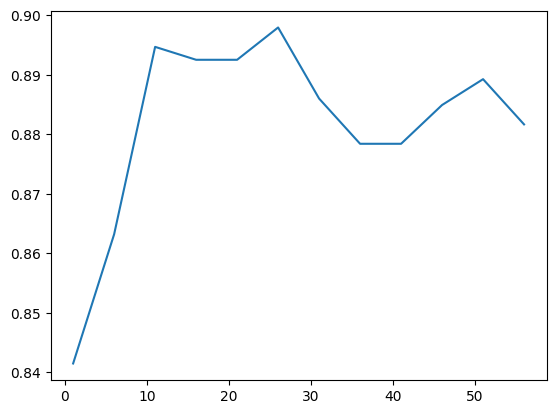

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

depts = [i for i in range(1, 57, 5)]
accuracies = []

for d in depts:
    pca = PCA(n_components=d)
    df_x_d = pca.fit_transform(df_x)

    X_train, X_test, y_train, y_test = train_test_split(df_x_d, y, test_size=0.2, random_state=42)
    
    dt_d_20 = DecisionTreeClassifier(max_depth=12)
    dt_d_20.fit(X_train, y_train)

    y_pred = dt_d_20.predict(X_test)
    dt_accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(dt_accuracy)

plt.plot(depts, accuracies)

In [36]:
accuracies

[0.8414766558089034,
 0.8631921824104235,
 0.8946796959826275,
 0.8925081433224755,
 0.8925081433224755,
 0.8979370249728555,
 0.8859934853420195,
 0.8783930510314875,
 0.8783930510314875,
 0.8849077090119435,
 0.8892508143322475,
 0.8816503800217155]

In [37]:
accuracies[5]

0.8979370249728555

In [38]:
pca = PCA(n_components=5)
df_x_d = pca.fit_transform(df_x)

X_train, X_test, y_train, y_test = train_test_split(df_x_d, y, test_size=0.2, random_state=42)

dt_d_20 = DecisionTreeClassifier(max_depth=12)
dt_d_20.fit(X_train, y_train)

y_pred = dt_d_20.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
dt_accuracy

0.8914223669923995

Smallest d for which I get the comparable results with Decision Tree Classifier is 5.